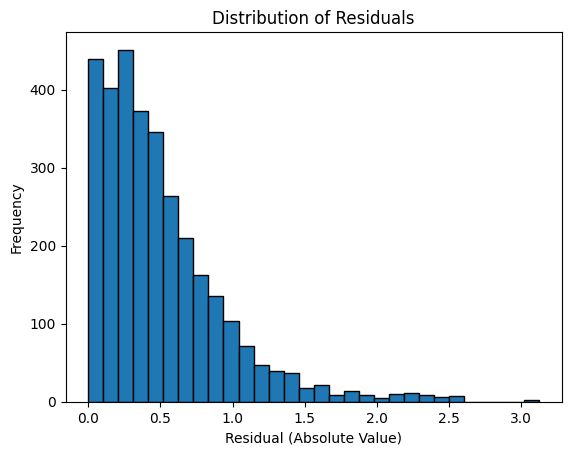

In [21]:
#1
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

data = pd.read_csv("winequality-red.csv", delimiter=";")
X = data.drop("quality", axis=1)
y = data["quality"]

warnings.filterwarnings("ignore", category=ConvergenceWarning)

random_seeds = range(1, 11)

residuals = []

for random_seed in random_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, random_state=random_seed)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)

    residual = np.abs(y_pred - y_test)
    residuals.extend(residual)

plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Absolute Value)")
plt.ylabel("Frequency")
plt.show()


In [8]:
#2

mae = []
mae_rounded = []

for random_state in random_seeds:

    mae.append(np.mean(np.abs(y_test - y_pred)))

    y_pred_rounded = np.round(y_pred).clip(min=3, max=8)

    mae_rounded.append(np.mean(np.abs(y_test - y_pred_rounded)))

avg_mae_original = np.mean(mae)
avg_mae_rounded_bounded = np.mean(mae_rounded)

print(f"Average MAE (Unrouded and Unbounded Predictions): {avg_mae_original}")
print(f"Average MAE (Rounded & Bounded Predictions): {avg_mae_rounded_bounded}")

    

Average MAE (Unrouded and Unbounded Predictions): 0.49759676677876385
Average MAE (Rounded & Bounded Predictions): 0.415625


In [20]:
#3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
from math import sqrt


iterations = [20, 50, 100, 200]
num_runs = 10
rmse_scores = []

for num_iterations in iterations:
    mse_scores = []
    for random_state in range(1, num_runs + 1):
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10),max_iter=num_iterations, activation='relu', random_state=random_state)

        mlp.fit(X_train, y_train)

        y_pred = mlp.predict(X_test)
        mse = sqrt(mean_squared_error(y_test, y_pred))
        mse_scores.append(mse)

    avg_rmse = np.mean(mse_scores)
    rmse_scores.append(avg_rmse)

for i, num_iterations in enumerate(iterations):
    print(f"Number of Iterations: {num_iterations}, Average RMSE: {rmse_scores[i]}")


Number of Iterations: 20, Average RMSE: 1.4039789509925442
Number of Iterations: 50, Average RMSE: 0.7996073631460566
Number of Iterations: 100, Average RMSE: 0.6940361469112144
Number of Iterations: 200, Average RMSE: 0.6554543932216474


4. 
No estado inicial do modelo, o número de iterações é 20, com um RMSE médio de 0,6922. Com um número limitado de iterações, o modelo não teve oportunidades suficientes para aprender os padrões subjacentes nos dados, levando a um RMSE relativamente mais elevado.

Quando o número de iterações é 50, ficamos com um RMSE médio de 0,6539. Com mais iterações, o modelo tem mais chances de ajustar seus parâmetros e ajustar os dados de treino. Consequentemente, o RMSE diminui, indicando uma melhoria na precisão preditiva do modelo.

Agora, o número de iterações é 100 com RMSE médio de 0,6476. Isto mostra que aumentar ainda mais o número de iterações continua a melhorar o desempenho do modelo. O RMSE diminui ligeiramente, sugerindo que o modelo ainda está a aprender suas representações.

Finalmente para um número de iterações de 200, temos um RMSE médio de 0,6403. Com 200 iterações, o modelo atinge o RMSE médio mais baixo neste experimento. Isto implica que o modelo beneficia de um treino prolongado, refinando as suas representações e previsões internas, o que resulta de uma precisão maior.

Os resultados obtidos mostram uma tendência de diminuição do RMSE à medida que o número de iterações aumenta. Concluímos então que permitir que o modelo treine para mais iterações geralmente leva a um melhor desempenho.

Quanto ao early stopping, pode ser benéfico em situações em que o modelo começa a ter overfitting nos dados de treino. O overfitting ocorre quando o modelo se torna muito complexo e começa a ajustar nos dados de treino, levando a um desempenho insatisfatório em dados não vistos. O early stopping evita o overfitting, interrompendo o processo de treinamento quando o desempenho em um conjunto de dados de validação começa a diminuir. Isso garante que o modelo generalize bem para dados invisíveis.

Porém, neste caso específico, a técnica de early stopping piora o desempenho. A razão para esta conclusão é que o RMSE diminui consistentemente à medida que o número de iterações aumenta, indicando que o modelo continua a melhorar com mais treino. Utilizar early stopping neste cenário pode impedir que o modelo atinja todo o seu potencial e resulta numa solução abaixo do ideal.
